In [1]:
import pickle
import pandas as pd
import numpy as np
import contractions
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# path to data
path = '/Users/victor/Desktop/capp30255_project/ml_adv_proj/data_processing'

with open(f'{path}/data_final.pkl', 'rb') as f:
    df = pickle.load(f)

pd.set_option('display.max_columns', None)


df.head()

,cbo_estimate_url,senate_passage,govtrack_url,PLaw,subcommittee_codes,sponsor_id,house_passage_vote,NameFirst,NameLast,congress,URL,primary_subject,Postal,withdrawn_cosponsors,house_passage,ComC,sponsor_title,ReportH,vetoed,PLawNum,IntrDate,number,PooleID,FrstConS,BillID,PassH,sponsor,Major_desc,MemberID,Cong,BillType,bill,sponsor_party,Gender,PassS,Private,Majority,SubChRef,bill_id,SubRankRef,MultNo,ChRef,State,Chamber,ReportS,committee_codes,District,presidential_statements,Mult,versions,DW1,congressdotgov_url,bill_uri,cosponsors,bill_slug,RankRef,latest_major_action_date,Cosponsr,last_vote,CumSServ,summary,sponsor_uri,FrstConH,enacted,senate_passage_vote,title,actions,ComR,committees,latest_major_action,Title,Minor_desc,MRef,introduced_date,sponsor_state,CumHServ,BillNum,Class,idx,cosponsors_by_party,summary_short,PLawDate,bill_type,active,votes,short_title,Major,Delegate,ImpBill,gpo_pdf_uri,Party,NameFull,Minor,Veto
0,None,None,https://www.govtrack.us/congress/bills/113/hco...,0,[],J000032,None,Sheila,Jackson Lee,113,https://www.congress.gov/bill/113th-congress/h...,Congress,TX,0,None,0.0,Rep.,0,None,NaN,2013-01-03,H.CON.RES.2,29573.0,0.0,113-HCONRES-2,0,Sheila Jackson Lee,None,29573-113-100,113,hconres,H.CON.RES.2,D,1,0,0,0,0.0,hconres2-113,0.0,1.0,0,49,0,0,[HSGO],18.0,[],0.0,[],"-0,468",https://www.congress.gov/bill/113th-congress/h...,https://api.propublica.org/congress/v1/113/bil...,0,hconres2,0,2013-01-03,0.0,None,0.0,Expresses the sense of Congress that a commemo...,https://api.propublica.org/congress/v1/members...,0.0,None,None,Expressing the sense of Congress that a commem...,"[{'id': 1, 'chamber': 'House', 'action_type': ...",0.0,House Oversight and Reform Committee,Referred to the House Committee on Oversight a...,Expressing the sense of Congress that a commem...,None,0,2013-01-03,TX,7304.0,2,NaN,hconres2,{},Expresses the sense of Congress that a commemo...,NaN,hconres,False,[],Expressing the sense of Congress that a commem...,NaN,0,0.0,None,100.0,Sheila Jackson Lee,NaN,0
1,None,None,https://www.govtrack.us/congress/bills/113/hco...,0,[],W000799,None,Timothy,Walz,113,https://www.congress.gov/bill/113th-congress/h...,Congress,MN,0,None,0.0,Rep.,0,None,NaN,2013-01-03,H.CON.RES.5,20726.0,0.0,113-HCONRES-5,0,Tim Walz,None,20726-113-100,113,hconres,H.CON.RES.5,D,0,0,0,0,0.0,hconres5-113,0.0,1.0,0,33,0,0,[HSHA],1.0,[],0.0,[],"-0,281",https://www.congress.gov/bill/113th-congress/h...,https://api.propublica.org/congress/v1/113/bil...,6,hconres5,0,2013-01-03,6.0,None,0.0,Authorizes the use of Emancipation Hall in the...,https://api.propublica.org/congress/v1/members...,0.0,None,None,Authorizing the use of Emancipation Hall in th...,"[{'id': 1, 'chamber': 'House', 'action_type': ...",0.0,House House Administration Committee,Referred to the House Committee on House Admin...,Authorizing the use of Emancipation Hall in th...,None,0,2013-01-03,MN,2921.0,5,NaN,hconres5,{'D': 6},Authorizes the use of Emancipation Hall in the...,NaN,hconres,False,[],Authorizing the use of Emancipation Hall in th...,NaN,0,0.0,None,100.0,Timothy Walz,NaN,0
2,None,None,https://www.govtrack.us/congress/bills/113/hco...,0,[HSJU10],K000009,None,Marcy,Kaptur,113,https://www.congress.gov/bill/113th-congress/h...,Government Operations and Politics,OH,0,None,0.0,Rep.,0,None,NaN,2013-01-04,H.CON.RES.6,15029.0,0.0,113-HCONRES-6,0,Marcy Kaptur,None,15029-113-100,113,hconres,H.CON.RES.6,D,1,0,0,0,0.0,hconres6-113,0.0,1.0,0,24,0,0,[HSJU],9.0,[],0.0,[],"-0,398",https://www.congress.gov/bill/113th-congress/h...,https://api.propublica.org/congress/v1/113/bil...,0,hconres6,0,2013-01-25,0.0,None,0.0,Expresses the sense of Congress that the Supre...,https://api.propublica.org/congress/v1/members...,0.0,None,None,Expressing the sense of Congress that the Supr...,"[{'id': 2, 'chamber': 'House', 'action_type': ...",0.0,House Judiciary Committee,Referred to the Subcommittee on the Constituti...,Expressing the sense of Congress that the Supr...,None,0,2013-01-04,OH,11688.

In [2]:
df['BillType'].value_counts(normalize=True, dropna=False)

BillType
hr         0.546773
s          0.289080
hres       0.076790
sres       0.054863
hconres    0.013528
hjres      0.010566
sconres    0.004509
sjres      0.003890
Name: proportion, dtype: float64

In [3]:
# filter only to house bills and senate bills
df = df[(df['BillType'] == 'hr') | (df['bill_type'] == 's')]

In [4]:
# columns with text
text_cols = ['summary', 'title', 'latest_major_action', 'Title', 'summary_short', 'short_title']

In [5]:
short_df = df[['BillID', 'title', 'summary']].copy()
short_df

,BillID,title,summary
85,113-HR-11,To reauthorize the Violence Against Women Act ...,Violence Against Women Reauthorization Act of ...
86,113-HR-12,"To modernize voter registration, promote acces...",Voter Empowerment Act of 2013 - Voter Registra...
87,113-HR-15,To provide for comprehensive immigration refor...,"Border Security, Economic Opportunity, and Imm..."
88,113-HR-20,To reform the financing of Congressional elect...,Government By the People Act of 2014 - Amends ...
89,113-HR-21,To provide for greater safety in the use of fi...,NRA Members' Gun Safety Act of 2013 - Amends t...
...,...,...,...
22214,114-S-3542,A bill to provide provisional protected presen...,Bar Removal of Individuals who Dream and Grow ...
22215,114-S-3544,"A bill to amend title 5, United States Code, t...",Wildland Firefighter Retirement and Disability...
22216,114-S-3545,"A bill to protect Federal, State, and local pu...",Protect Our Heroes Act of 2016 This bill amend...
22217,114-S-3546,A bill to provide provisional protected presen...,Securing Active and Fair Enforcement Act or th...


In [6]:
short_df['total_words'] = short_df['summary'].str.split().str.len()
short_df['total_words'].describe()

count    18907.000000
mean       256.003173
std       1114.499010
min          5.000000
25%         73.000000
50%        131.000000
75%        236.000000
max      61839.000000
Name: total_words, dtype: float64

In [7]:
short_df['summary']

85       Violence Against Women Reauthorization Act of ...
86       Voter Empowerment Act of 2013 - Voter Registra...
87       Border Security, Economic Opportunity, and Imm...
88       Government By the People Act of 2014 - Amends ...
89       NRA Members' Gun Safety Act of 2013 - Amends t...
                               ...                        
22214    Bar Removal of Individuals who Dream and Grow ...
22215    Wildland Firefighter Retirement and Disability...
22216    Protect Our Heroes Act of 2016 This bill amend...
22217    Securing Active and Fair Enforcement Act or th...
22218    All Economic Regulations are Transparent Act o...
Name: summary, Length: 18907, dtype: object

In [8]:
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

In [9]:
def clean_summary(column):
    column = column.apply(lambda x: contractions.fix(str(x)))
    column = column.str.replace(r'[^\w\s]+', '', regex=True)
    column = column.str.lower()
    column = column.str.strip()
    column = column.replace(r'\s\s+', ' ', regex=True)
    column = column.apply(lemmatize_text)
    return column

In [10]:
short_df['summary'] = clean_summary(short_df['summary'])
short_df['title'] = clean_summary(short_df['title'])

In [11]:
short_df['summary']

85       violence against woman reauthorization act of ...
86       voter empowerment act of 2013 voter registrati...
87       border security economic opportunity and immig...
88       government by the people act of 2014 amend the...
89       nra member gun safety act of 2013 amend the fe...
                               ...                        
22214    bar removal of individual who dream and grow o...
22215    wildland firefighter retirement and disability...
22216    protect our hero act of 2016 this bill amend t...
22217    secure active and fair enforcement act or the ...
22218    all economic regulation be transparent act of ...
Name: summary, Length: 18907, dtype: object

In [12]:
custom_stop_words = ['united', 'states', 'bill']
my_stop_words = list(stop_words) + custom_stop_words

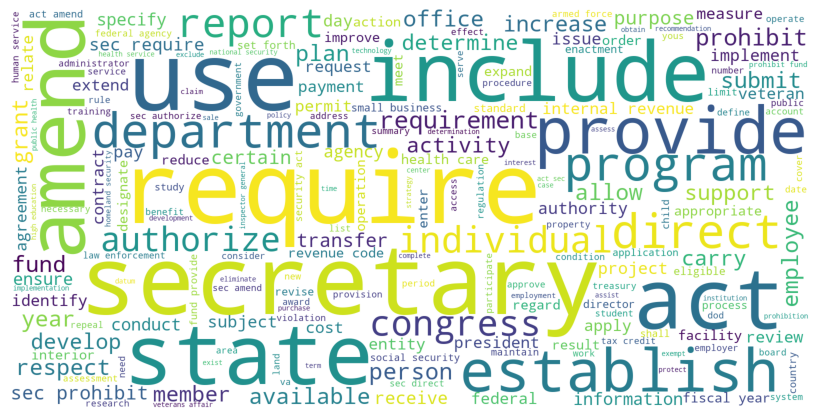

In [13]:
# create wordcloud for bill's summary
wordcloud_summary = WordCloud(width=1600,
                              height=800,
                              background_color='white',
                              stopwords=my_stop_words,
                              max_font_size=200).generate(' '.join(short_df['summary']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [14]:
short_df['title']

85       to reauthorize the violence against woman act ...
86       to modernize voter registration promote access...
87       to provide for comprehensive immigration refor...
88       to reform the financing of congressional elect...
89       to provide for great safety in the use of firearm
                               ...                        
22214    a bill to provide provisional protect presence...
22215    a bill to amend title 5 united states code to ...
22216    a bill to protect federal state and local publ...
22217    a bill to provide provisional protect presence...
22218    a bill to amend title 5 united states code to ...
Name: title, Length: 18907, dtype: object

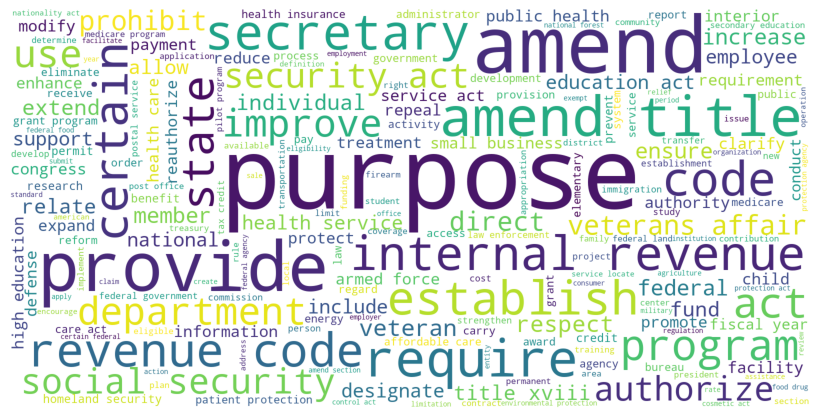

In [15]:
# create wordcloud for bill's title
wordcloud_title = WordCloud(width=1600,
                            height=800,
                            background_color='white',
                            stopwords=my_stop_words,
                            max_font_size=200).generate(' '.join(short_df['title']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_title) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()